In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sentiment_analysis_project/data.csv")

In [ ]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
df.shape

(8518, 8)

In [ ]:
df.describe()

,Up Votes,Down Votes,Ratings
count,8508.000000,8508.000000,8518.000000
mean,0.391396,0.121768,4.181028
std,11.613909,3.248022,1.262200
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,0.000000,5.000000
75%,0.000000,0.000000,5.000000
max,889.000000,219.000000,5.000000


In [ ]:
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [ ]:
#Function to classify reviews as positive or negative based on ratings
def review(rating):
    if rating >= 3.0:
        return 'Positive'
    else:
        return 'Negative'



In [ ]:
df['Sentiment'] = df['Ratings'].apply(review)

In [ ]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,Positive
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,Negative
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,Negative
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3,Positive
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1,Negative
...,...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Positive
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Negative
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,Positive
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Negative


In [ ]:
df1 = df[["Review text","Sentiment"]]

In [ ]:
df1.isnull().sum()

Review text    8
Sentiment      0
dtype: int64

In [ ]:
df1 = df1.dropna()

In [ ]:
df1.isnull().sum()

Review text    0
Sentiment      0
dtype: int64

In [ ]:
df1 = df1.rename(columns= {"Review text":"Review"})

<Axes: xlabel='Sentiment', ylabel='count'>

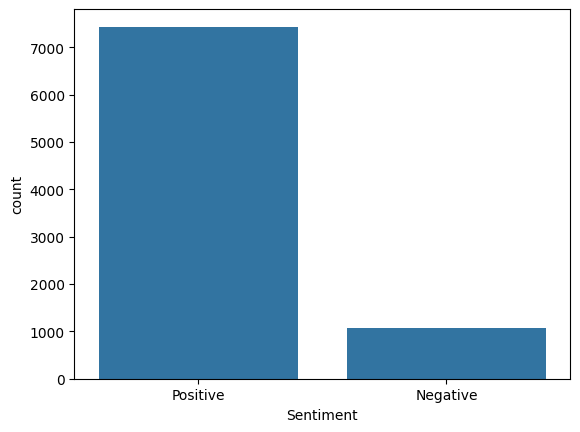

In [ ]:
sns.countplot(x = "Sentiment", data = df1)

<Axes: ylabel='Sentiment'>

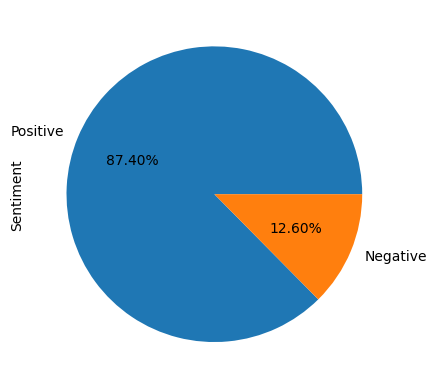

In [ ]:
df1['Sentiment'].value_counts().plot.pie(autopct='%.2f%%')

#### Identify Input and Output

In [ ]:
X = df1[["Review"]]
y = df1["Sentiment"]

#### Split the Data into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=45)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6808, 1) (6808,)
(1702, 1) (1702,)


In [ ]:
X_train

,Review
1672,GdREAD MORE
7754,Good quality.READ MORE
6276,awesome productREAD MORE
6321,not played yet but seems goodREAD MORE
79,Good quality productREAD MORE
...,...
3704,SatisfactionREAD MORE
163,Waste of moneyREAD MORE
6012,quality is goodREAD MORE
6558,Good one. Received original product. Thanks t...


#### Data Preprocessing on train data (X_train)

In [ ]:
import nltk

# Download the punctuations
nltk.download('punkt')
# Download the stop words corpus
nltk.download('stopwords')
# Downloading wordnet before applying Lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
## initialise the inbuilt stemmer
stemmer = PorterStemmer()

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)

    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()

    # remove stop words
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]

    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]

    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [ ]:
from tqdm import tqdm, tqdm_notebook

In [ ]:
tqdm.pandas()

In [ ]:
%time temp_df = X_train['Review'].progress_apply(lambda x: preprocess(x,'lemma'))

temp_df.head()


100%|██████████| 6808/6808 [00:09<00:00, 706.61it/s]

CPU times: user 8.54 s, sys: 823 ms, total: 9.37 s
Wall time: 9.64 s


,0,1
1672,gdread,1
7754,good quality read,3
6276,awesome productread,2
6321,played yet seems goodread,4
79,good quality productread,3


In [ ]:
temp_df.columns = ['clean_review_lemma','text_length_lemma']
temp_df.head()

,clean_review_lemma,text_length_lemma
1672,gdread,1
7754,good quality read,3
6276,awesome productread,2
6321,played yet seems goodread,4
79,good quality productread,3


In [ ]:
X_train = pd.concat([X_train, temp_df], axis=1)
X_train.head()

,Review,clean_review_lemma,text_length_lemma
1672,GdREAD MORE,gdread,1
7754,Good quality.READ MORE,good quality read,3
6276,awesome productREAD MORE,awesome productread,2
6321,not played yet but seems goodREAD MORE,played yet seems goodread,4
79,Good quality productREAD MORE,good quality productread,3


### Creating the WordCloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
positive_df = X_train.loc[y_train=='Positive',:]
positive_df.head()

,Review,clean_review_lemma,text_length_lemma
1672,GdREAD MORE,gdread,1
7754,Good quality.READ MORE,good quality read,3
6276,awesome productREAD MORE,awesome productread,2
6321,not played yet but seems goodREAD MORE,played yet seems goodread,4
79,Good quality productREAD MORE,good quality productread,3


In [ ]:
positive_df = X_train.loc[y_train=='Positive', :]

words = ' '.join(positive_df['clean_review_lemma'])

cleaned_word = " ".join([word for word in words.split()
                        if 'subject' not in word])

In [ ]:
positive_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

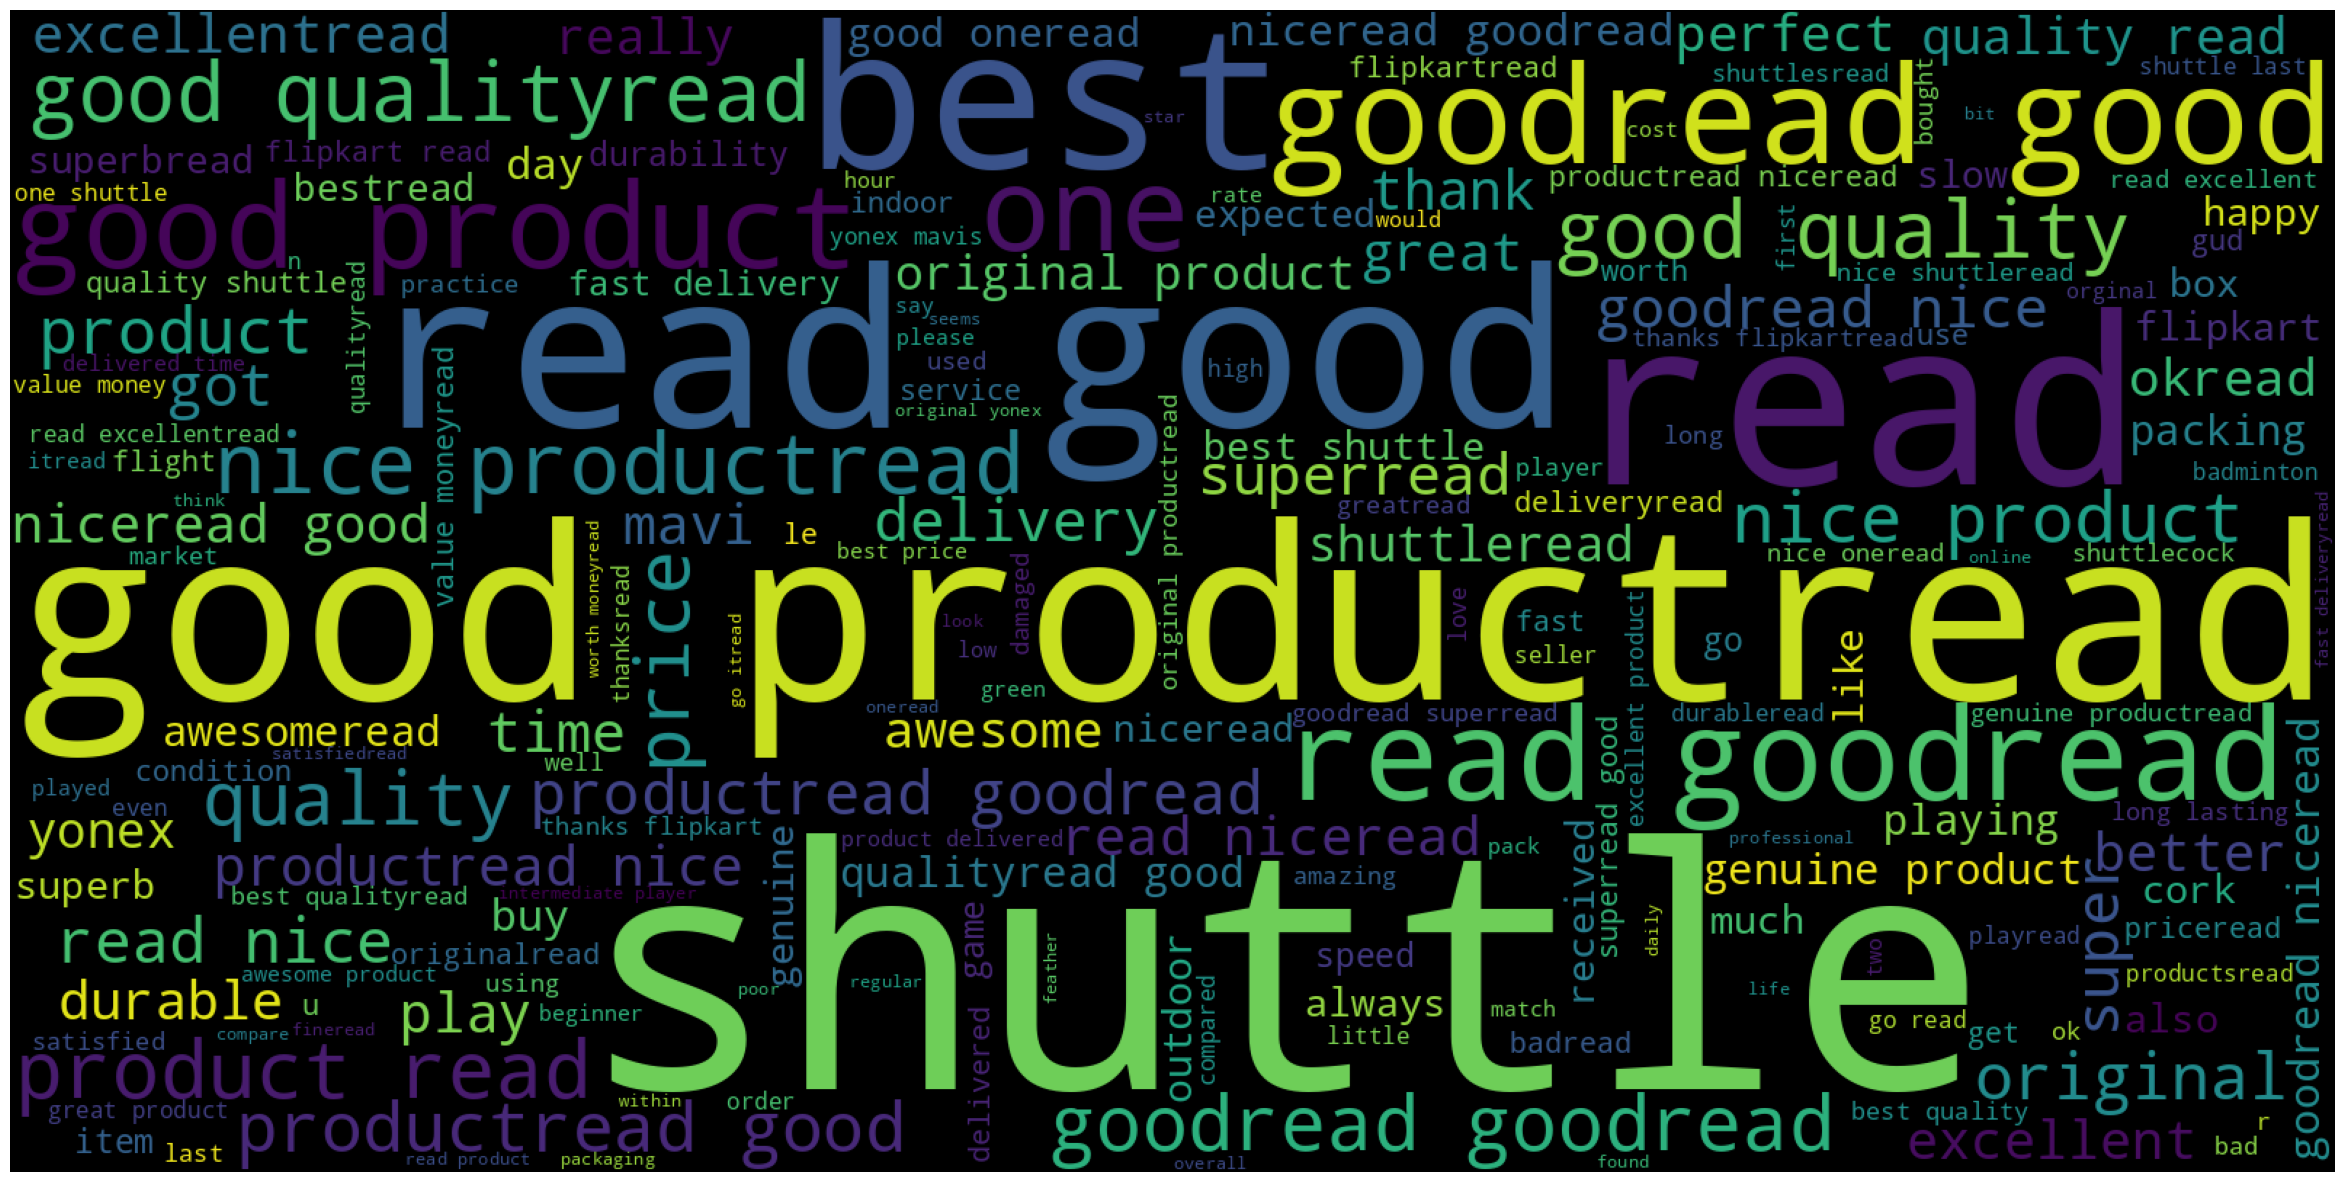

In [ ]:
plt.figure(1,figsize=(30,20))
plt.imshow(positive_wordcloud)
plt.axis('off')
plt.show()

In [ ]:
negative_df = X_train.loc[y_train=='Negative', :]

words = ' '.join(negative_df['clean_review_lemma'])

cleaned_word = " ".join([word for word in words.split()
                        if 'subject' not in word])


In [ ]:
negative_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

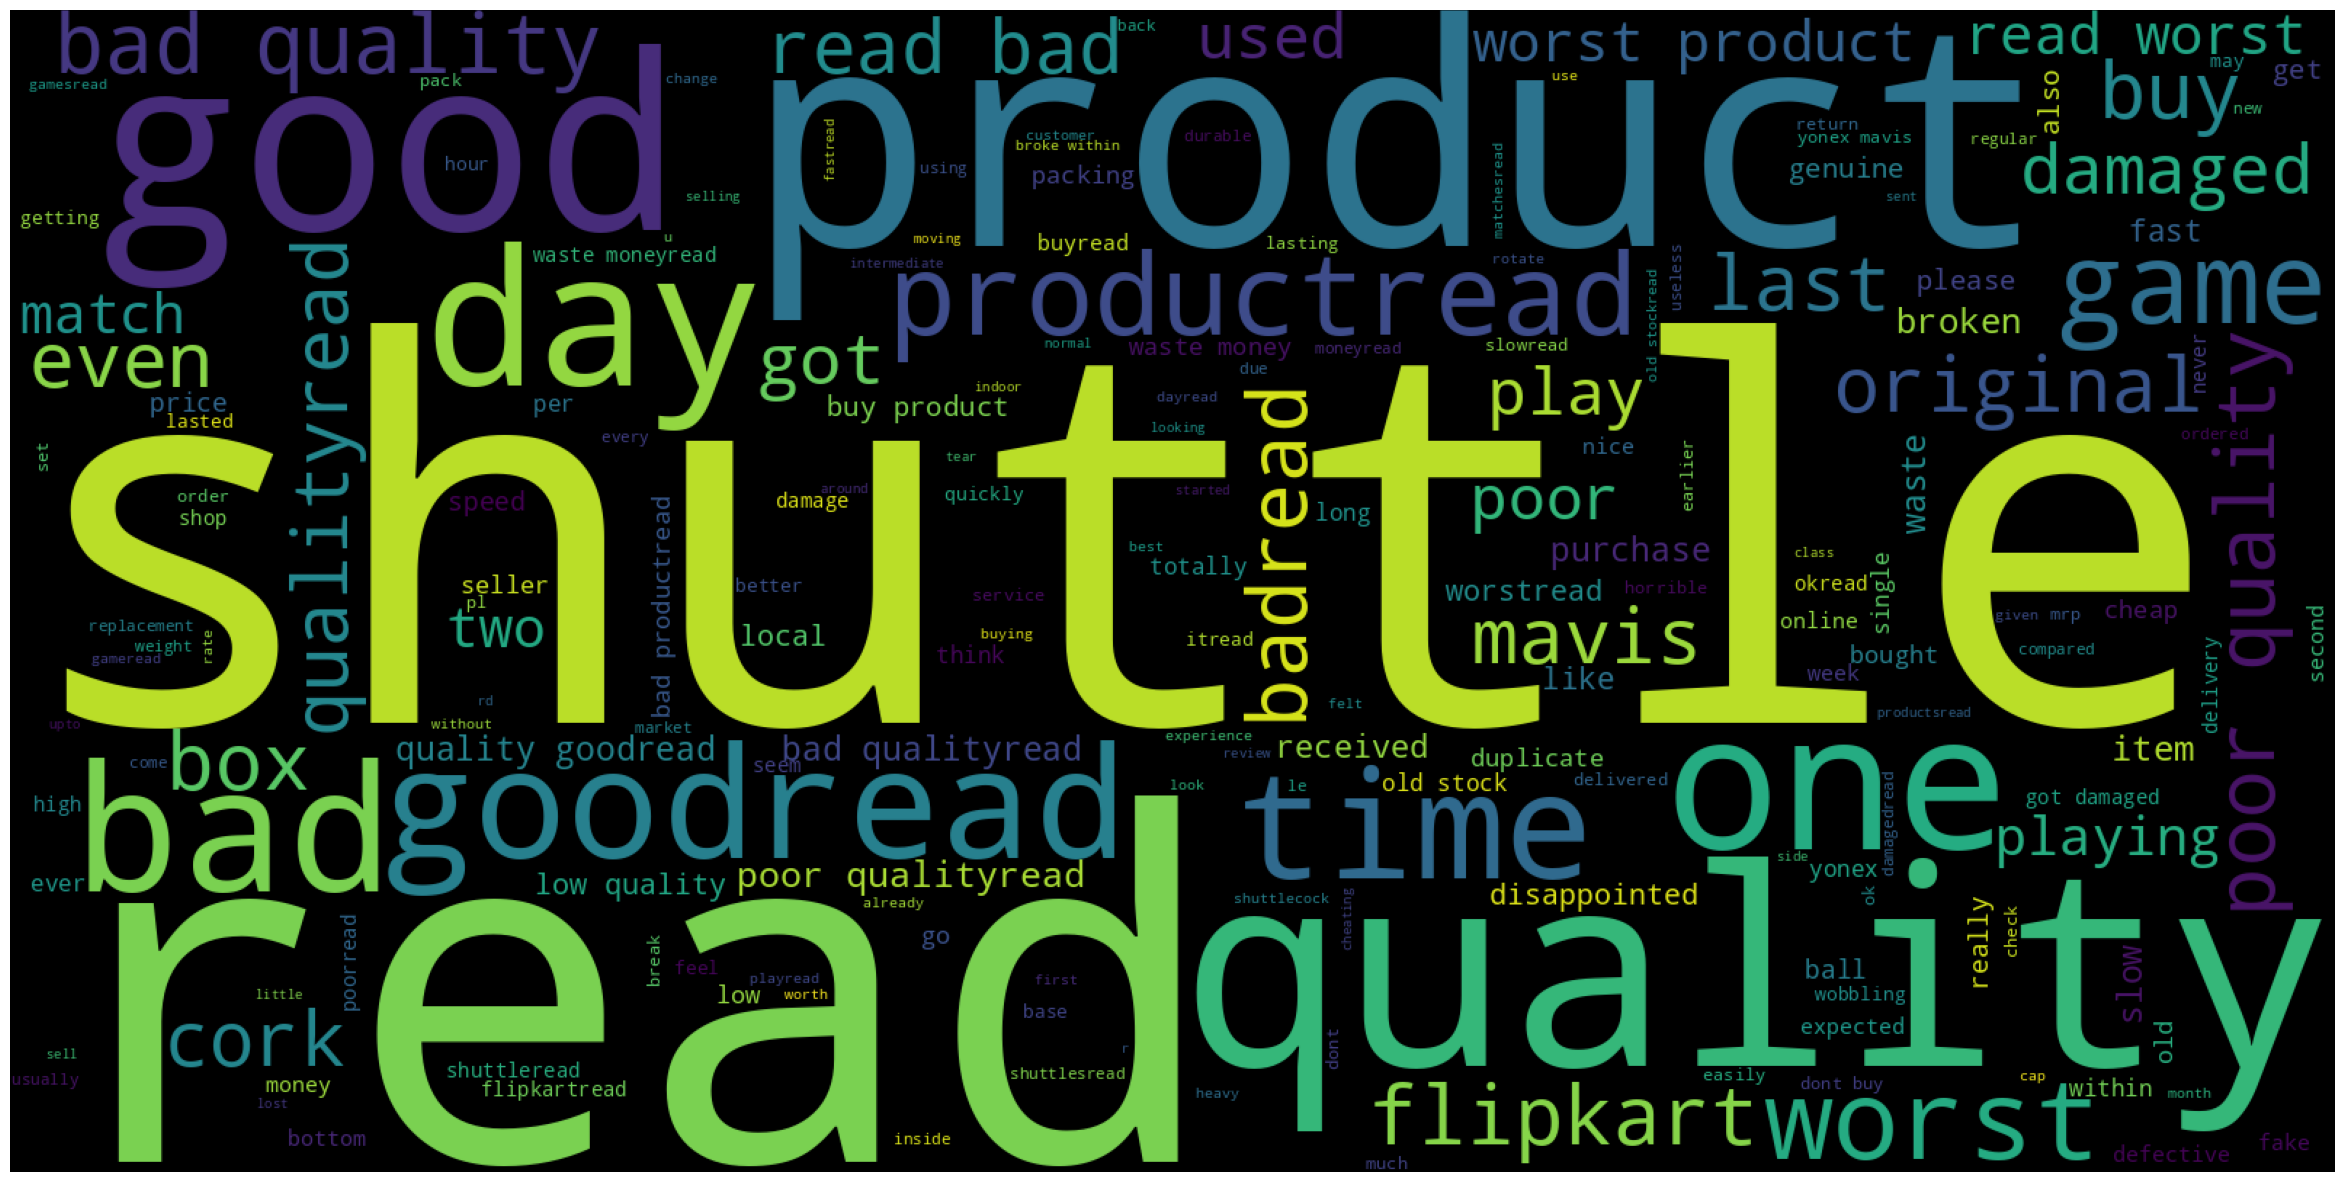

In [ ]:
plt.figure(1,figsize=(30,20))
plt.imshow(negative_wordcloud)
plt.axis('off')
plt.show()

Converting Text to Numerical vectors - Word2Vec

In [ ]:
X_train.head()

,Review,clean_review_lemma,text_length_lemma
1672,GdREAD MORE,gdread,1
7754,Good quality.READ MORE,good quality read,3
6276,awesome productREAD MORE,awesome productread,2
6321,not played yet but seems goodREAD MORE,played yet seems goodread,4
79,Good quality productREAD MORE,good quality productread,3


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
%time X_train_bow = cv.fit_transform(X_train['clean_review_lemma'])

CPU times: user 64.2 ms, sys: 124 µs, total: 64.4 ms
Wall time: 79.4 ms


In [ ]:
X_train_bow

<6808x2635 sparse matrix of type '<class 'numpy.int64'>'
	with 23821 stored elements in Compressed Sparse Row format>

In [ ]:
print("Total unique words:", len(cv.vocabulary_))

print("Type of train features:", type(X_train_bow))

print("Shape of input data:", X_train_bow.shape)

Total unique words: 2635
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (6808, 2635)


In [ ]:
print(X_train_bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from sys import getsizeof

print(type(X_train_bow))
print(getsizeof(X_train_bow), "Bytes")

<class 'scipy.sparse._csr.csr_matrix'>
48 Bytes


In [ ]:
from sys import getsizeof

print(type(X_train_bow.toarray()))
print(getsizeof(X_train_bow.toarray()), "Bytes")

<class 'numpy.ndarray'>
143512768 Bytes


In [ ]:
X_test.head()

,Review
5345,value for moneyREAD MORE
6621,low qualityREAD MORE
8465,Good qualityREAD MORE
573,Value for money bad productREAD MORE
6106,goodREAD MORE


In [ ]:
temp_df = X_test['Review'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

100%|██████████| 1702/1702 [00:01<00:00, 1061.66it/s]


,0,1
5345,value moneyread,2
6621,low qualityread,2
8465,good qualityread,2
573,value money bad productread,4
6106,goodread,1


In [ ]:
temp_df.columns = ['clean_review_lemma','text_length_lemma']

temp_df.head()

,clean_review_lemma,text_length_lemma
5345,value moneyread,2
6621,low qualityread,2
8465,good qualityread,2
573,value money bad productread,4
6106,goodread,1


In [ ]:
X_test = pd.concat([X_test, temp_df], axis=1)

X_test.head()

,Review,clean_review_lemma,text_length_lemma
5345,value for moneyREAD MORE,value moneyread,2
6621,low qualityREAD MORE,low qualityread,2
8465,Good qualityREAD MORE,good qualityread,2
573,Value for money bad productREAD MORE,value money bad productread,4
6106,goodREAD MORE,goodread,1


In [ ]:
%time X_test_bow = cv.transform(X_test['clean_review_lemma'])

CPU times: user 16.4 ms, sys: 0 ns, total: 16.4 ms
Wall time: 16.5 ms


### Model Building

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_bow, y_train) # train the model(timing it with an IPython "magic command")

CPU times: user 18.3 ms, sys: 5 µs, total: 18.3 ms
Wall time: 21.4 ms


MultinomialNB()

## Evaluation on Train Data

In [ ]:
from sklearn import metrics
# make class predictions for X_train_dtm
y_train_pred = nb.predict(X_train_bow)

metrics.accuracy_score(y_train, y_train_pred)

0.9347826086956522

In [ ]:
metrics.confusion_matrix(y_train, y_train_pred)

array([[ 521,  341],
       [ 103, 5843]])

Text(0.5, 23.52222222222222, 'Predicted')

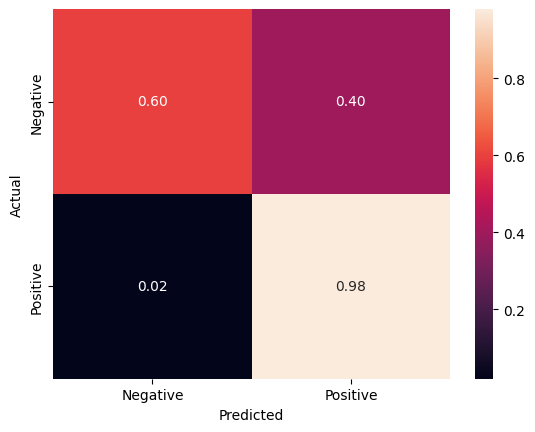

In [ ]:
cm = metrics.confusion_matrix(y_train, y_train_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

## Evaluation on Test Data

In [ ]:
y_test_pred = nb.predict(X_test_bow)

metrics.accuracy_score(y_test, y_test_pred)

0.917743830787309

Text(0.5, 23.52222222222222, 'Predicted')

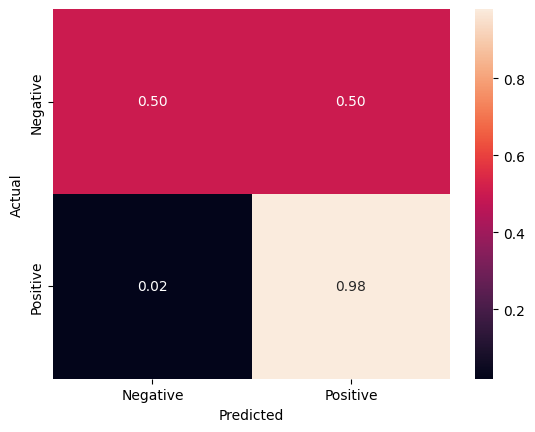

In [ ]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
import joblib


In [ ]:
nb.cv = cv
joblib.dump(nb, "senstiment_nb.pkl")

['senstiment_nb.pkl']

In [ ]:
from google.colab import files
files.download('senstiment_nb.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>